In [ ]:
# !pip install tensorflow
# !pip install keras

In [1]:
import numpy as np
import tensorflow as tf
import random as rn
import sklearn
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical  

In [2]:
print(tf.__version__)

2.19.0


<font color='mediumblue'>
## 신경망 구축 방법 
    <br>
- 단계 1: 데이터 로드 및 처리 <br>
- 단계 2: 모델과 아키텍처를 정의<br>
- 단계 3: 최적화 도구 및 함수 선택<br>
- 단계 4: 모델 학습 <br>
- 단계 5: 모델 성능 평가<br>
- 단계 6: 성능 최적화 
</font>    

## A real example — recognizing handwritten digits(손글씨) ##

우리는 손으로 쓴 숫자를 인식할 수 있는 네트워크를 구축할 것이다. <br>이 목표를 달성하기 위해, 우리는 60,000개의 예와 10,000개의 예제의 훈련 세트로 구성된 손으로 쓴 숫자의 데이터베이스인 MNIST를 사용한다. <br>교육 예에는 정답이 적힌 주석이 달려 있다. <br>예를 들어 손으로 쓴 숫자가 숫자 3이면 숫자 3은 해당 예제와 연관된 레이블일 뿐입니다. <br>각 MNIST 영상은 그레이 스케일로 구성되며 28 x 28픽셀로 구성됩니다. <br>다음 다이어그램에는 이러한 숫자들이 나와 있습니다.

![Deep%20Learning%20with%20Keras.bmp](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToXD458Zgqs8VLLzbJPImOK6EgAf4OBquibDaUnw344dkcd1kT)

아래 6개의 서로 다른 신경망을 구축하고 그 성능을 비교합니다.
* [Case #1: Defining a simple neural net in Keras](#Case-#1:-Defining-a-simple-neural-net-in-Keras)
* [Case #2: Improving the simple net in Keras with hidden layers](#Case-#2:-Improving-the-simple-net-in-Keras-with-hidden-layers)
* [Case #3: Further improving the simple net in Keras with dropout](#Case-#3:-Further-improving-the-simple-net-in-Keras-with-dropout)
* [Case #4: Testing different optimizers in Keras](#Case-#4:-Testing-different-optimizers-in-Keras)
* [Case #5: Adopting regularization for avoiding overfitting](#Case-#5:-Adopting-regularization-for-avoiding-overfitting)

<font color = "#CC3D3D"><br>
## Case #1: Defining a simple neural net in Keras

### Step 1: Load and Process the Data ###

In [3]:
# mnist 이미지 데이터
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784 # 전체 픽셀 갯수

X_train = X_train.reshape(60000, RESHAPED) # 학습이미지 6만개
X_test = X_test.reshape(10000, RESHAPED) # 평가이미지 만개
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 한 픽셀 값은 0~255로 표현된다. 0은 흰색, 255는 검은색

# normalize
X_train /= 255 
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# 뉴럴넷은 입력데이터에 대한 스케일 조정이 필요
# to_categorical : 찾을 값이 0~9까지이므로 10개로 원핫 인코딩을 한다.

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

60000 train samples
10000 test samples


### Step 2: Define the Model & its Architecture ###

In [4]:
# 10 outputs
# final stage is softmax
model = Sequential()

# Dense : 입력모드가 784(RESHAPED), 첫번째 히든레이어는 10개로 연결하라
model.add(Dense(10, input_shape=(RESHAPED,))) 
model.add(Activation('softmax'))

model.summary() # 종합한것을 본다.  
# Param 이 weight 이다. 7850개를 학습시키면 된다.

C:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Choose the Optimizer and the Cost function

In [5]:
# optimizer : SGD 는 최적의 방법을 찾는 것
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

### Step 4: Train the Model

In [6]:
%%time
# validation_split 0.2 : 80은 학습하고 20%는 평가를 위해 남겨 두겠다
# verbose : 중간 중간의 과정을 찍을 것인지 말것인지, 얼마나 자세하게 정보를 표시할 것인가를 지정. (0, 1, 2)
history = model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, 
                    validation_split=0.2)
# history변수에 저장한 것은 나중에 체크해보기 위함.

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4841 - loss: 1.7738 - val_accuracy: 0.8194 - val_loss: 0.9009
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8170 - loss: 0.8586 - val_accuracy: 0.8533 - val_loss: 0.6614
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8456 - loss: 0.6712 - val_accuracy: 0.8673 - val_loss: 0.5643
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8589 - loss: 0.5880 - val_accuracy: 0.8747 - val_loss: 0.5109
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8678 - loss: 0.5360 - val_accuracy: 0.8798 - val_loss: 0.4766
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8709 - loss: 0.5047 - val_accuracy: 0.8855 - val_loss: 0.4521
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8748 - loss: 0.4848 - val_accuracy: 0.8884 - val_loss: 0.4337
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8777 - loss: 0.4646 - val_accuracy: 0.

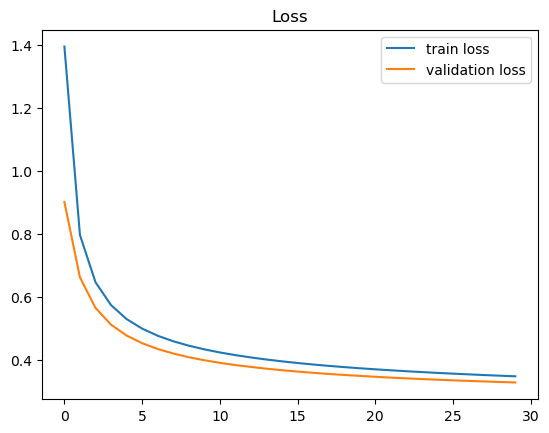

In [7]:
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [8]:
# evaluate : 전체
# 케라스는 pridict 하면 확률을 출력한다.
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.8955 - loss: 0.3750
Test score: 0.32762423157691956
Test accuracy: 0.9108999967575073


##### Save & Load the Model

In [9]:
from keras.models import load_model

In [10]:
# 모델 저장
model.save('mnist_dnn_01.h5')
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 0B89-131C

 C:\Users\admin\머신러닝 디렉터리

2025-03-28  오후 02:45    <DIR>          .
2025-03-28  오후 02:45    <DIR>          ..
2025-03-28  오후 02:37    <DIR>          .ipynb_checkpoints
2025-03-20  오후 01:48            13,649 0318여자성별맞추기(박규태).ipynb
2025-03-28  오후 12:50            25,743 4_Intro_CNN.ipynb
2025-03-28  오후 12:52            40,396 5_Classic_CNN.ipynb
2025-03-24  오전 10:15               560 accommodations.csv
2018-10-20  오전 11:18        47,241,969 Allstate_train.csv
2018-12-07  오후 07:11           542,685 bank.csv
2018-12-15  오후 01:30           125,204 breast_cancer.csv
2025-03-28  오후 02:44        41,494,600 cats_and_dogs_small_1.h5
2018-11-03  오후 02:38               120 city.csv
2025-03-28  오후 02:45         1,151,079 CNN-개와 고양이 판별.ipynb
2018-10-06  오후 02:00         1,252,058 college.csv
2025-03-10  오후 05:08            27,003 country_filled.csv
2025-03-28  오후 02:07    <DIR>          data
2018-10-19  오후 09:25         4,826,904 DATA_01.csv
2025-03-13  

In [11]:
# 모델 로딩
model2 = load_model('mnist_dnn_01.h5')

<font color = "#CC3D3D"><br>
## Case #2: Improving the simple net in Keras with hidden layers <br><br>

<img src="https://miro.medium.com/max/2398/1*N8UXaiUKWurFLdmEhEHiWg.jpeg"/>    

### Step 2: Define the Model & its Architecture ###

In [12]:
model = Sequential()

# 첫번째 층
model.add(Dense(32, input_shape=(RESHAPED,)))
model.add(Activation('relu')) # 엑티베이션 함수를 relu 함수로 사용

# 두변째 층
model.add(Dense(32, activation='relu')) # 위의 두줄을 한줄로 표현
#model.add(Activation('relu'))

# 세번째 층
model.add(Dense(32))
model.add(Activation('relu'))

# 출력층
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

# 총 weight 수가 27,562개

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,562 (107.66 KB)

 Trainable params: 27,562 (107.66 KB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Choose the Optimizer and the Cost function

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

### Step 4: Train the Model

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3719 - loss: 1.9079 - val_accuracy: 0.8222 - val_loss: 0.6078
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8383 - loss: 0.5548 - val_accuracy: 0.8937 - val_loss: 0.3696
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8916 - loss: 0.3766 - val_accuracy: 0.9066 - val_loss: 0.3159
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9113 - loss: 0.3100 - val_accuracy: 0.9189 - val_loss: 0.2786
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9158 - loss: 0.2914 - val_accuracy: 0.9253 - val_loss: 0.2605
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9250 - loss: 0.2592 - val_accuracy: 0.9287 - val_loss: 0.2393
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9298 - loss: 0.2374 - val_accuracy: 0.9323 - val_loss: 0.2278
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9353 - loss: 0.2249 - val_accuracy: 0.

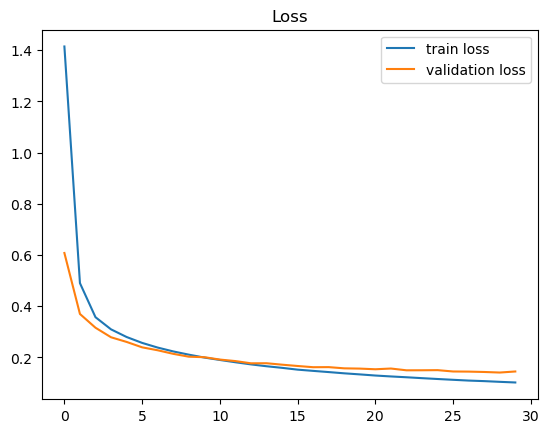

In [14]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=30, verbose=1, 
                    validation_split=0.2)

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [15]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

model.save('mnist_dnn_02.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.9528 - loss: 0.1588


Test score: 0.13662691414356232
Test accuracy: 0.9591000080108643


# CNN(Convolutional Neural networks)
<img src="https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" /> <br><br>
## 합성곱
<img src="https://miro.medium.com/max/875/1*GcI7G-JLAQiEoCON7xFbhg.gif" />

In [16]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])
model.summary()


C:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

<font color = "#CC3D3D"><br>
## Case #3: Further improving the simple net in Keras with dropout

### Step 2: Define the Model & its Architecture ###

In [17]:
from keras.layers import Dropout

# Dropout : 층별로 오버피팅을 줄일 수 있도록 지정할 수 있다.
model = Sequential()

model.add(Dense(128, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(0.2)) # Dropout 비율을 20%로 하라

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Choose the Optimizer and the Cost function

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

### Step 4: Train the Model

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3641 - loss: 1.9482 - val_accuracy: 0.8226 - val_loss: 0.8154
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7263 - loss: 0.9212 - val_accuracy: 0.8698 - val_loss: 0.5048
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7960 - loss: 0.6743 - val_accuracy: 0.8915 - val_loss: 0.4093
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8252 - loss: 0.5740 - val_accuracy: 0.9013 - val_loss: 0.3607
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8470 - loss: 0.5110 - val_accuracy: 0.9077 - val_loss: 0.3296
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8597 - loss: 0.4774 - val_accuracy: 0.9138 - val_loss: 0.3080
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8701 - loss: 0.4401 - val_accuracy: 0.9172 - val_loss: 0.2898
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8775 - loss: 0.4130 - val_accuracy: 0.

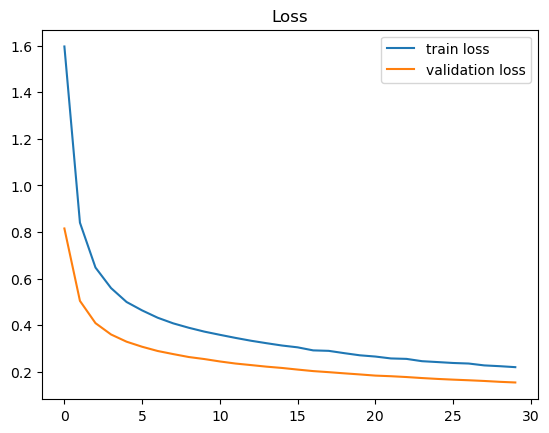

In [19]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, 
                    validation_split=0.2)

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [20]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

model.save('mnist_dnn_03.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.9456 - loss: 0.1807


Test score: 0.15497906506061554
Test accuracy: 0.9538000226020813


<font color = "#CC3D3D"><br>
## Case #4: Testing different optimizers in Keras 

### Step 2: Define the Model & its Architecture ###

In [21]:
model = Sequential()
model.add(Dense(128, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Choose the Optimizer and the Cost function

In [22]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

### Step 4: Train the Model

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7903 - loss: 0.6807 - val_accuracy: 0.9513 - val_loss: 0.1666
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9388 - loss: 0.2032 - val_accuracy: 0.9640 - val_loss: 0.1203
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9562 - loss: 0.1450 - val_accuracy: 0.9709 - val_loss: 0.0976
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9642 - loss: 0.1173 - val_accuracy: 0.9728 - val_loss: 0.0915
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9677 - loss: 0.1027 - val_accuracy: 0.9747 - val_loss: 0.0901
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9714 - loss: 0.0935 - val_accuracy: 0.9757 - val_loss: 0.0864
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9749 - loss: 0.0819 - val_accuracy: 0.9754 - val_loss: 0.0830
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9771 - loss: 0.0722 - val_accuracy: 0.

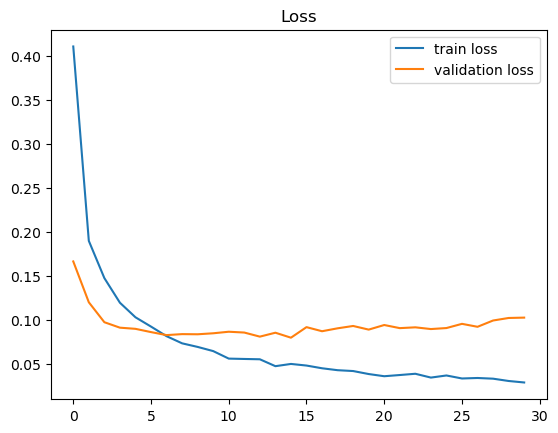

In [23]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=30, verbose=1, 
                    validation_split=0.2)

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [24]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

model.save('mnist_dnn_04.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.9741 - loss: 0.1022


Test score: 0.0819404125213623
Test accuracy: 0.9799000024795532


<font color = "#CC3D3D"><br>
## Case #5: Adopting regularization for avoiding overfitting
<br><img src="https://i.stack.imgur.com/j2F6j.png" width=600 height=400>

### Step 2: Define the Model & its Architecture

In [25]:
# 오버피팅을 줄이는 방법
from keras import regularizers

# Max norm constraints: 
# refer to http://cs231n.github.io/neural-networks-2/#reg
# 각 은닉 단위에 입사되는 가중치가 원하는 값보다 작거나 같은 표준을 갖도록 제한합니다.
from keras.constraints import max_norm 

# Batch normalization layer normalizes the activations of the previous layer at each batch,
# i.e. applies a transformation that maintains the mean activation close to 0 
# and the activation standard deviation close to 1.
from keras.layers import BatchNormalization # 이전 계층의 활성화를 정상화
# 기본적으로 정규화를 하는 이유는 학습을 더 빨리 하기 위해서 
# or Local optimum 문제에 빠지는 가능성을 줄이기 위해서 사용한다
# Whitening(백색잡음) 문제 해결을 위해 학습 시 평균과 분산을 조정

#출처: https://eehoeskrap.tistory.com/430 [Enough is not enough]

model = Sequential()
#model.add(Dense(128, input_shape=(RESHAPED,), kernel_regularizer=regularizers.l2(0.01), kernel_initializer="glorot_normal"))
model.add(Dense(128, input_shape=(RESHAPED,), kernel_constraint=max_norm(2.), kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
#model.add(Dense(64, kernel_regularizer=regularizers.l2(0.01), kernel_initializer="glorot_normal"))
model.add(Dense(64, kernel_constraint=max_norm(2.), kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

### Step 3: Choose the Optimizer and the Cost function

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

### Step 4: Train the Model

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7578 - loss: 0.8073 - val_accuracy: 0.9463 - val_loss: 0.1882
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9318 - loss: 0.2386 - val_accuracy: 0.9626 - val_loss: 0.1291
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9461 - loss: 0.1799 - val_accuracy: 0.9682 - val_loss: 0.1092
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9581 - loss: 0.1398 - val_accuracy: 0.9704 - val_loss: 0.0973
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9630 - loss: 0.1229 - val_accuracy: 0.9728 - val_loss: 0.0915
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9669 - loss: 0.1066 - val_accuracy: 0.9735 - val_loss: 0.0914
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 0.0982 - val_accuracy: 0.9748 - val_loss: 0.0855
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0877 - val_accuracy: 0.

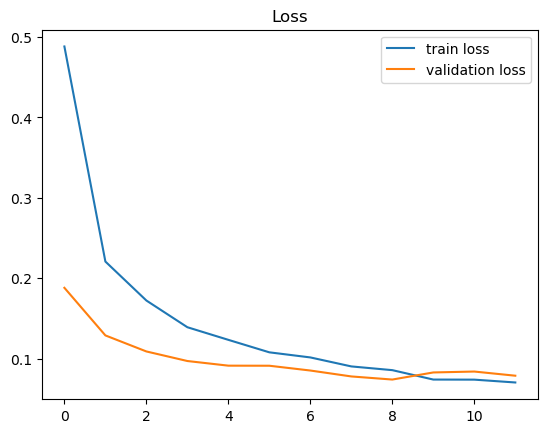

In [27]:
# Early stopping is basically stopping the training once your loss starts to increase.
# 학습 조기 종료를 위해 더 이상 개선의 여지가 없을 때 학습을 종료시키는 콜백함수
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=3)
# patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 
#           줄 것인 가를 지정합니다. 
# 만약 10이라고 지정하면 개선이 없는 에포크가 10번째 지속될 경우 학습을 종료합니다.

history = model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, 
                    validation_split=0.2, callbacks=[early_stop])

plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.title("Loss")
plt.show()

### Step 5: Evaluate the Model performance

In [28]:
score = model.evaluate(X_test, Y_test, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

model.save('mnist_dnn_05.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.9745 - loss: 0.0875


Test score: 0.07304231822490692
Test accuracy: 0.9782999753952026


## End